In [93]:
import os

def get_absolute_path(relative_path):
    # Convert relative path to absolute path
    absolute_path = os.path.abspath(relative_path)
    return absolute_path

In [97]:
import pandas as pd
# Load the dataset
stations_final = pd.read_csv('../data/processed/groupby/stations_final.csv')

# 1. Datetime Analysis

### 1.1. Average Percentage of Docks Available by Hour

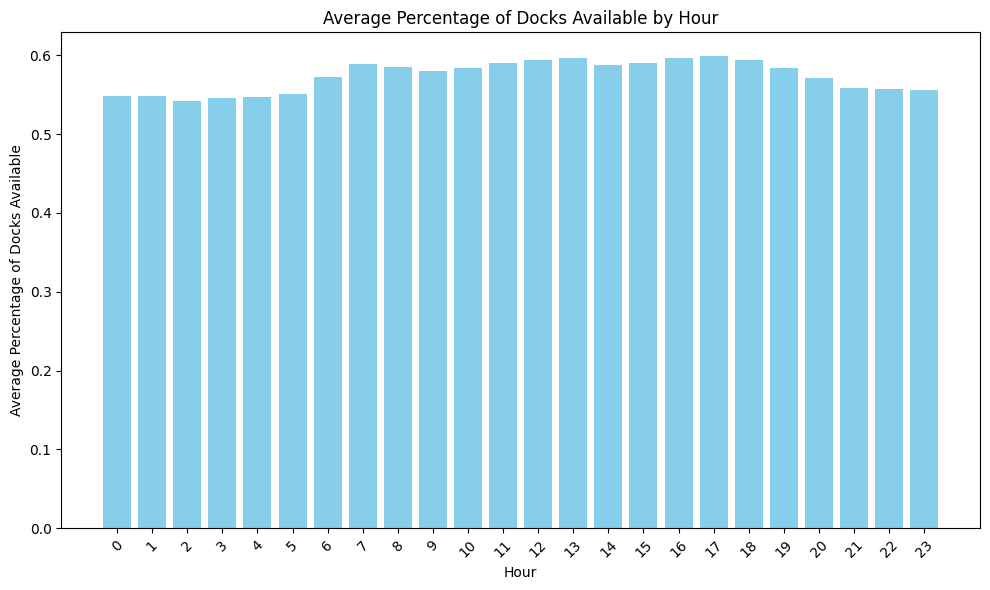

In [98]:
import matplotlib.pyplot as plt

# Group by 'hour' and calculate the mean of 'percentage_docks_available'
stations_final_by_hour = stations_final.groupby('hour')['percentage_docks_available'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Create a numeric range for the x-axis positions
x_pos = range(len(stations_final_by_hour['hour']))

# Plot using numeric x positions
plt.bar(x_pos, stations_final_by_hour['percentage_docks_available'], color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Docks Available')
plt.title('Average Percentage of Docks Available by Hour')

# Set x-ticks to be the hours from the DataFrame
plt.xticks(x_pos, stations_final_by_hour['hour'], rotation=45)  # Adjust rotation if necessary
plt.tight_layout()
plt.show()

### 1.2. Average Percentage of Docks Available by Weekday

/var/folders/b_/j13k5nq9673_y1f35zsdbfk80000gn/T/ipykernel_21518/957250492.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stations_final_by_hour = stations_final.groupby('weekday')['percentage_docks_available'].mean().reset_index()


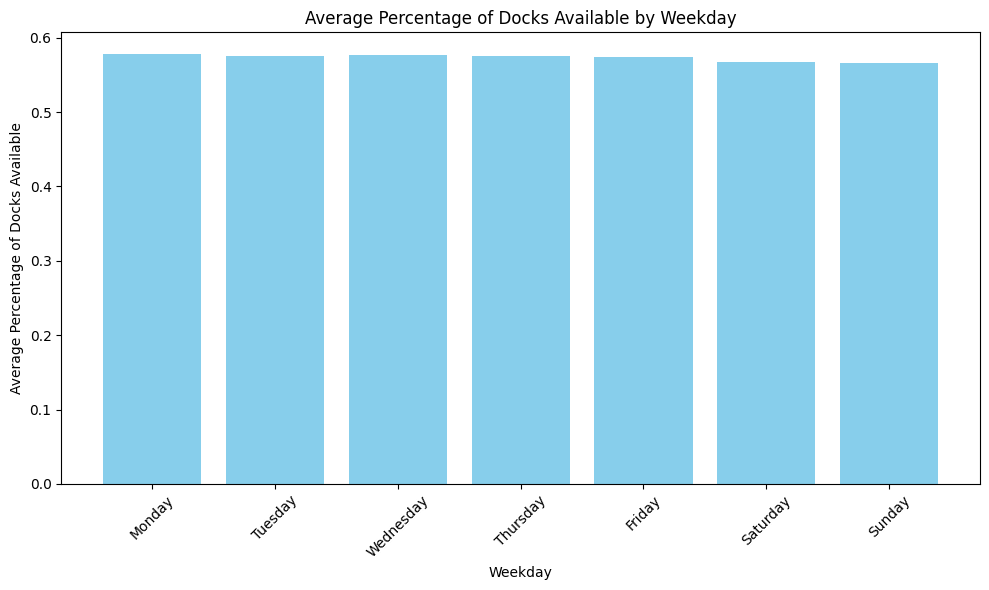

In [125]:
import matplotlib.pyplot as plt
import pandas as pd  # Import Pandas for data handling

# Specify the order of the weekdays
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'weekday' into a categorical type with a defined order
stations_final['weekday'] = pd.Categorical(stations_final['weekday'], categories=day_order, ordered=True)

# Group by 'weekday' and calculate the mean of 'percentage_docks_available', ensuring order is maintained
stations_final_by_hour = stations_final.groupby('weekday')['percentage_docks_available'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Create a numeric range for the x-axis positions
x_pos = range(len(stations_final_by_hour['weekday']))

# Plot using numeric x positions
plt.bar(x_pos, stations_final_by_hour['percentage_docks_available'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Average Percentage of Docks Available')
plt.title('Average Percentage of Docks Available by Weekday')

# Set x-ticks to be the weekdays from the DataFrame
plt.xticks(x_pos, stations_final_by_hour['weekday'], rotation=45)  # Adjust rotation if necessary
plt.tight_layout()  # Adjust layout to fit elements
plt.show()

### 1.3. Average Percentage of Docks Available by Month

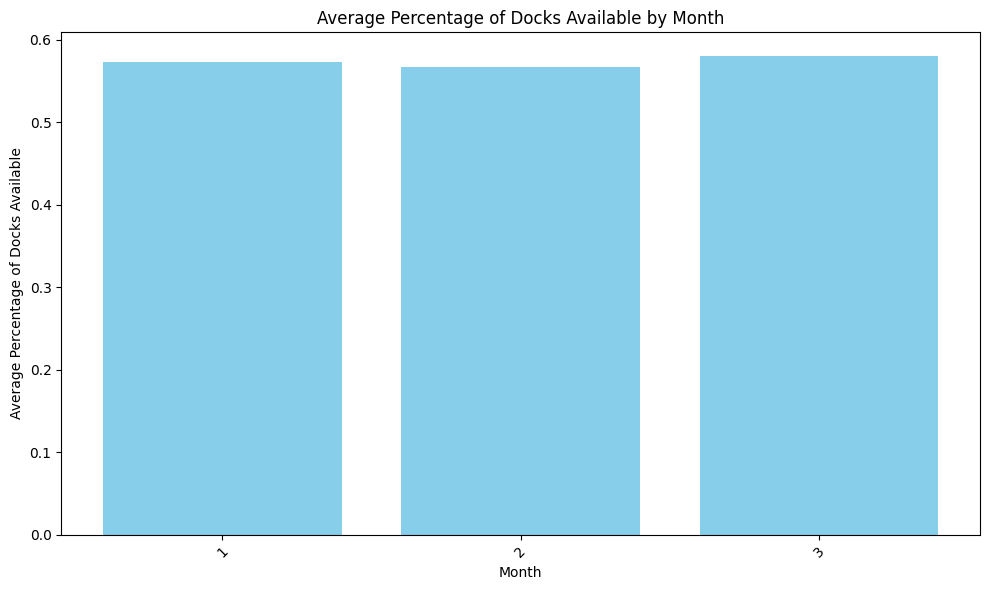

In [128]:

import matplotlib.pyplot as plt

# Group by 'month' and calculate the mean of 'percentage_docks_available'
stations_final_by_hour = stations_final.groupby('month')['percentage_docks_available'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Create a numeric range for the x-axis positions
x_pos = range(len(stations_final_by_hour['month']))

# Plot using numeric x positions
plt.bar(x_pos, stations_final_by_hour['percentage_docks_available'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Percentage of Docks Available')
plt.title('Average Percentage of Docks Available by Month')

# Set x-ticks to be the hours from the DataFrame
plt.xticks(x_pos, stations_final_by_hour['month'], rotation=45)  # Adjust rotation if necessary
plt.tight_layout()
plt.show()

### 1.4. Average Percentage of Docks Available by Hour and Laboral Day

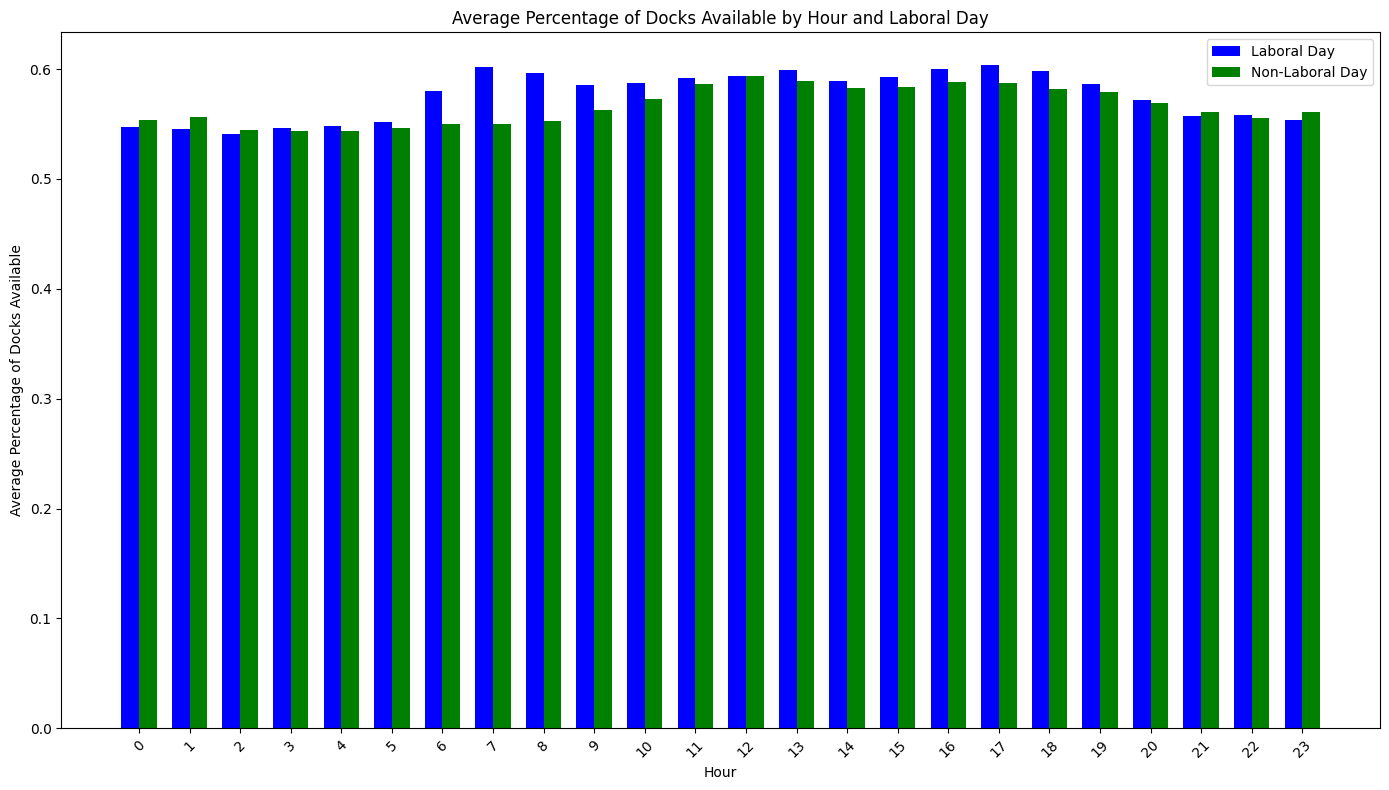

In [126]:
import matplotlib.pyplot as plt

# Group by 'hour' and 'laboral_day' and calculate the mean of 'percentage_docks_available'
stations_final_by_laboral_day_and_hour = stations_final.groupby(['hour', 'laboral_day'])['percentage_docks_available'].mean().unstack()

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the size to fit your specific needs

# Create bars for laboral and non-laboral days
x = range(len(stations_final_by_laboral_day_and_hour))  # Numeric range for x-axis positions based on the number of hours
width = 0.35  # Width of the bars

# Create bar plots
plt.bar(x, stations_final_by_laboral_day_and_hour[True], width=width, label='Laboral Day', color='blue')
plt.bar([p + width for p in x], stations_final_by_laboral_day_and_hour[False], width=width, label='Non-Laboral Day', color='green')

plt.xlabel('Hour')  # Label for the x-axis
plt.ylabel('Average Percentage of Docks Available')  # Label for the y-axis
plt.title('Average Percentage of Docks Available by Hour and Laboral Day')  # Title of the plot

# Set x-ticks to be the hours from the DataFrame, positioned in the center of the grouped bars
plt.xticks([p + width / 2 for p in x], stations_final_by_laboral_day_and_hour.index, rotation=45)  # Adjust rotation if necessary
plt.legend()  # Add legend to distinguish between laboral and non-laboral days

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

Next, we divided the days of the week into working days (Monday to Friday) and non-working days (Saturday and Sunday) to examine hourly patterns. We excluded other public holidays, as there are only two (January 1 and January 6) in the first quarter. The data shows that on weekdays, people use the Bicing system to commute to work in the morning (6-9 am), resulting in more bicycles in circulation and thus more docks available, even during winter. Conversely, on weekends, particularly during late-night hours associated with leisure activities and going out, the opposite trend is observed.

# 2. Location Analysis

### 2.1. Median Percentage of Docks Available by Postcode

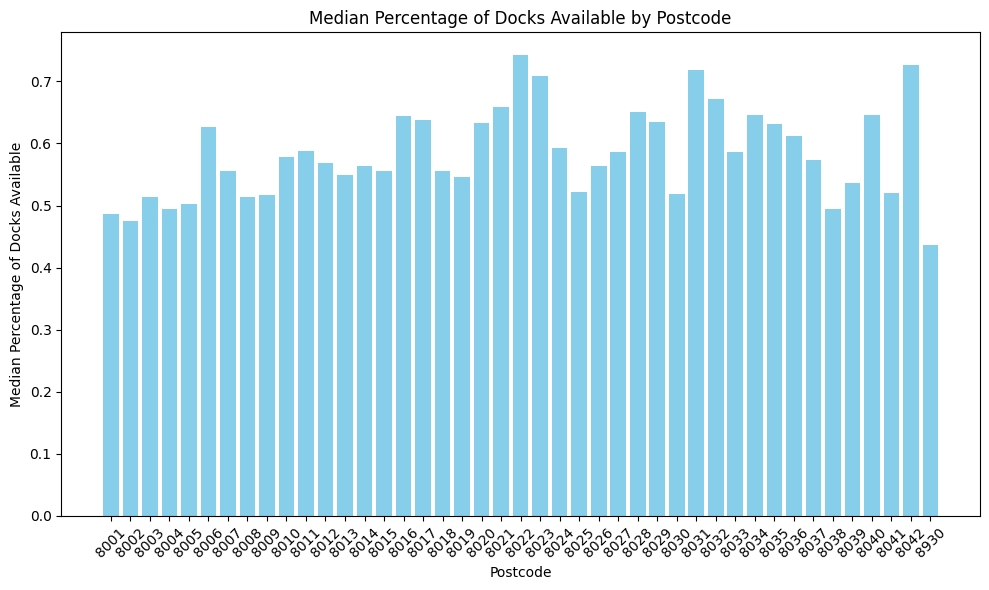

In [100]:
import matplotlib.pyplot as plt

stations_final_by_post_code = stations_final.groupby('post_code')['percentage_docks_available'].mean().reset_index()
stations_final_by_post_code['post_code'] = stations_final_by_post_code['post_code'].astype('category')

# Plotting
plt.figure(figsize=(10, 6))
# Create a numeric range for the x-axis positions
x_pos = range(len(stations_final_by_post_code['post_code']))

# Plot using numeric x positions
plt.bar(x_pos, stations_final_by_post_code['percentage_docks_available'], color='skyblue')
plt.xlabel('Postcode')
plt.ylabel('Median Percentage of Docks Available')
plt.title('Median Percentage of Docks Available by Postcode')  # Title of the plot

# Set x-ticks to be the postcodes from the DataFrame
plt.xticks(x_pos, stations_final_by_post_code['post_code'], rotation=45)  # Rotate the postcodes on x-axis to avoid clutter

plt.tight_layout()
plt.show()

The figure shows the mean percentage of available spots per station by postcodes. There are significant differences in percentages (means) between different zones of Barcelona. The stations in some postcodes are on average emptier (have higher percentages of available spots) than others. This is especially for postcodes in high altutide zones of Barcelona (such as 08021, 08022, 08023, 08031, 08032). This makese sense because most people take the bike to go downhill but few people do the reverse.



The figure illustrates the average percentage of spaces available per hour. Even though there are more bicycles in circulation during the day, the absolute difference in space availability between day and night is minimal, fluctuating only between 2 and 3 percentage points. This indicates that the variation in the usage of the entire system throughout the day is relatively small. Furthermore, we can infer that more than 50% of the bicycles are in circulation throughout the entire day.

### 2.2. Average Percentage of Docks Available by Hour and Postcode

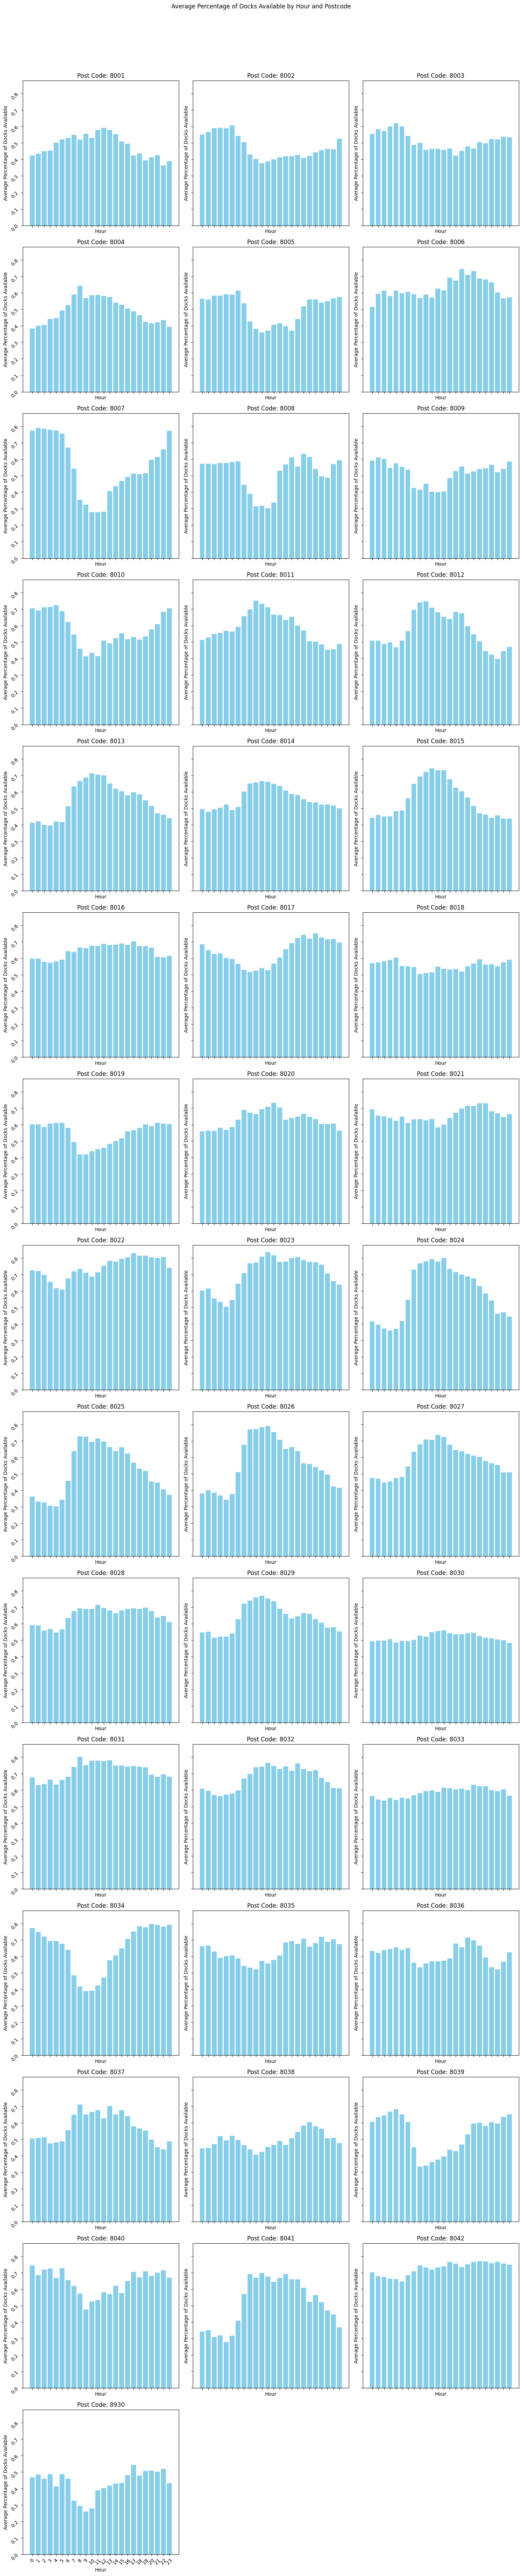

In [101]:
import matplotlib.pyplot as plt

# Group by 'post_code' and 'hour', then calculate the mean
stations_final_by_post_code_and_hour = stations_final.groupby(['post_code', 'hour'])['percentage_docks_available'].mean().reset_index()

# Get unique post_codes
post_codes = stations_final_by_post_code_and_hour['post_code'].unique()

# Determine the layout of the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(post_codes) + n_cols - 1) // n_cols  # Compute the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharex=True, sharey=True)
fig.suptitle('Average Percentage of Docks Available by Hour and Postcode')

# Flatten the axes array for easier iteration if there are multiple rows and columns
axes = axes.flatten()

# Loop through each post_code and create a plot
for i, code in enumerate(post_codes):
    ax = axes[i]
    # Filter the data for the current post_code
    data = stations_final_by_post_code_and_hour[stations_final_by_post_code_and_hour['post_code'] == code]
    # Create a numeric range for the x-axis positions
    x_pos = range(len(data['hour']))
    # Plot
    ax.bar(x_pos, data['percentage_docks_available'], color='skyblue')
    ax.set_title(f'Post Code: {code}')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Average Percentage of Docks Available')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(data['hour'])
    ax.tick_params(labelrotation=45)

# Hide any unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to make room for the main title
plt.show()

The previous set of figures displays the average percentage of docks available by hour and postcode. Zones/postcodes with high activity during the day (for example, Plaça Catalunya - 08007) exhibit a U-shape, indicating that many people leave their bikes there (few spots available) as we approach midday. In residential areas or other places that are less busy during the day but where people return home to sleep, we observe a flat curve or even an inverted U-shape. We can conclude from these patterns that there is a clear correlation between the central zones and the peripheries.

### 2.3. Average Percentage of Docks Available by Postcode and Laboral Day

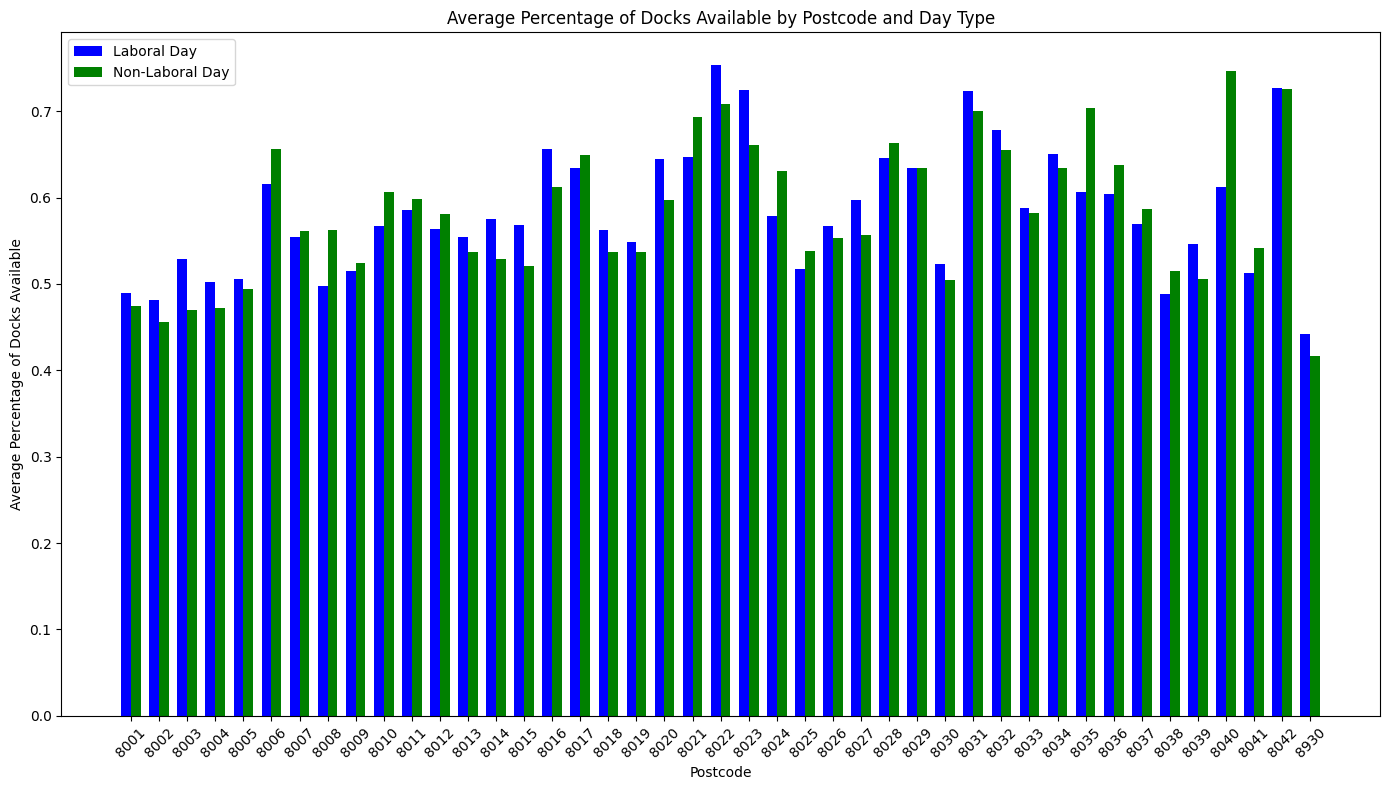

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'post_code' and 'laboral_day', then calculate the mean of 'percentage_docks_available'
stations_final_by_post_code_and_laboral_day = stations_final.groupby(['post_code', 'laboral_day'])['percentage_docks_available'].mean().unstack()

# Plotting
plt.figure(figsize=(14, 8))  # Adjust the size to fit your specific needs

# Create bars for laboral and non-laboral days
x = range(len(stations_final_by_post_code_and_laboral_day))  # Numeric range for x-axis positions based on the number of postcodes
width = 0.35  # Width of the bars

# Create bar plots
plt.bar(x, stations_final_by_post_code_and_laboral_day[True], width=width, label='Laboral Day', color='blue')  # Bars for laboral days
plt.bar([p + width for p in x], stations_final_by_post_code_and_laboral_day[False], width=width, label='Non-Laboral Day', color='green')  # Bars for non-laboral days

plt.xlabel('Postcode')  # Label for the x-axis
plt.ylabel('Average Percentage of Docks Available')  # Label for the y-axis
plt.title('Average Percentage of Docks Available by Postcode and Laboral Day')  # Title of the plot

# Set x-ticks to be the postcodes from the DataFrame, positioned in the center of the grouped bars
plt.xticks([p + width / 2 for p in x], stations_final_by_post_code_and_laboral_day.index, rotation=45)  # Adjust rotation if necessary
plt.legend()  # Add legend to distinguish between laboral and non-laboral days

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

We divided the days again into working days (Monday to Friday) and non-working days (Saturday and Sunday) to compare patterns across postcodes. We excluded other public holidays, since there are only two (January 1 and January 6) in the first quarter. The graph highlights differences between business/industrial zones, leisure zones, and balanced neighborhoods. For example, Zona Franca (postcode 08040) is an industrial area that attracts workers from other areas during the week (resulting in higher occupancy/fewer spots available) but sees fewer people on weekends (more spots available). Similarly, in 08007 (Plaça Catalunya), workers commuting out of Barcelona city leave their bikes during the week to catch other forms of transportation to work. In contrast, neighborhoods visited for leisure on weekends but less so during the week (such as the Gothic Quarter - 08003) experience the opposite trend.

# 3. Altitude Analysis

### 3.1. Relationship Between Station Altitude and Average Dock Availability

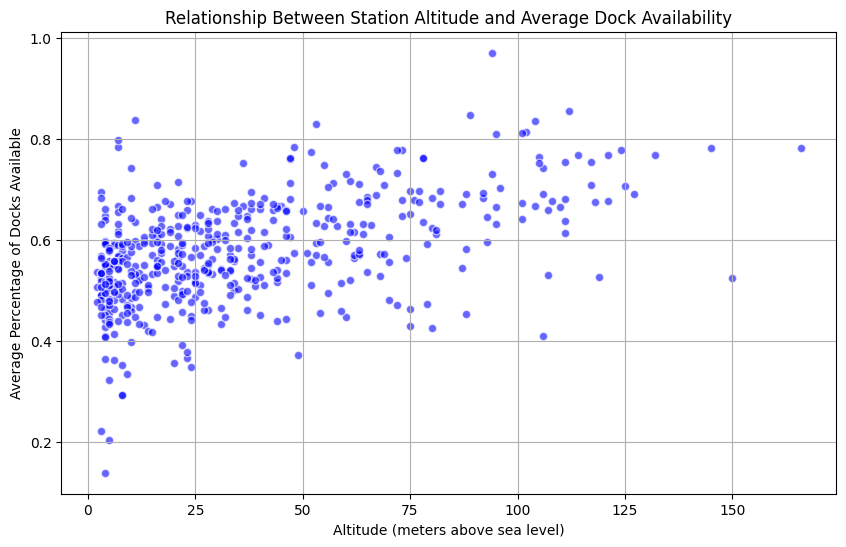

In [104]:
import matplotlib.pyplot as plt

# Calculate the average occupancy and the average altitude for each station
stations_final_by_station_id = stations_final.groupby('station_id').agg({
    'percentage_docks_available': 'mean',
    'altitude': 'mean'
}).reset_index()

# Plotting setup
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(stations_final_by_station_id['altitude'], stations_final_by_station_id['percentage_docks_available'], alpha=0.6, edgecolors='w', color='blue')

plt.xlabel('Altitude (meters above sea level)')  # X-axis label
plt.ylabel('Average Percentage of Docks Available')  # Y-axis label
plt.title('Relationship Between Station Altitude and Average Dock Availability')  # Graph title

# Display the plot
plt.grid(True)  # Add a grid for easier reading
plt.show()

Here, we plot the average percentage of bikes available at each station against the station's altitude. Each dot in the figure represents one station. The graph reveals a slight upward trend, suggesting that stations at higher altitudes tend to have more spots available. This is likely because users often take bikes downhill into the city, while fewer people make the return journey uphill.

### 3.2. Mean Percentage of Docks Available by Altitude of Postal Code

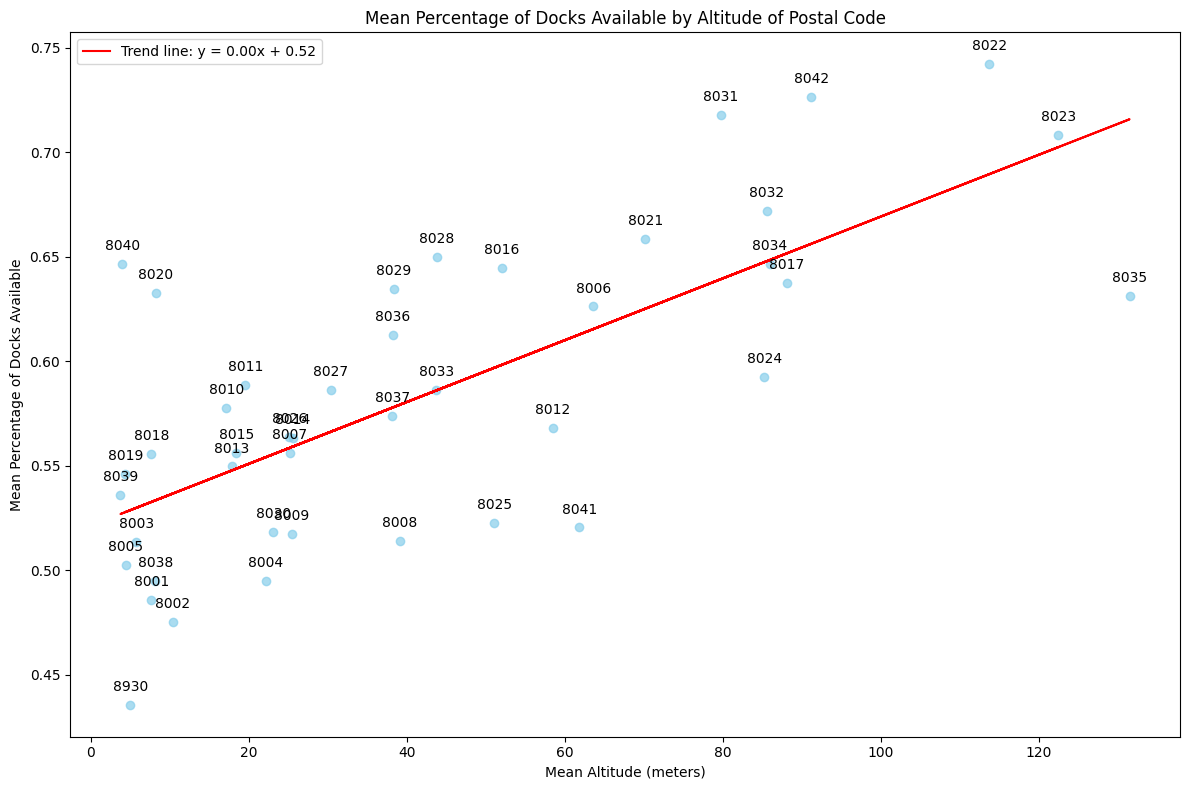

In [105]:
import matplotlib.pyplot as plt
import numpy as np

stations_final_by_post_code = stations_final.groupby('post_code').agg({
    'percentage_docks_available': 'mean',  # Calculate mean percentage of docks available
    'altitude': 'mean'  # Calculate mean altitude for each postal code
}).reset_index()

stations_final_by_post_code['post_code'] = stations_final_by_post_code['post_code'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size to fit your specific needs

# Create scatter plot
plt.scatter(stations_final_by_post_code['altitude'], stations_final_by_post_code['percentage_docks_available'], color='skyblue', alpha=0.7)

# Fit and plot a linear regression line
slope, intercept = np.polyfit(stations_final_by_post_code['altitude'], stations_final_by_post_code['percentage_docks_available'], 1)
plt.plot(stations_final_by_post_code['altitude'], slope * stations_final_by_post_code['altitude'] + intercept, color='red', label=f'Trend line: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Mean Altitude (meters)')  # Label for the x-axis
plt.ylabel('Mean Percentage of Docks Available')  # Label for the y-axis
plt.title('Mean Percentage of Docks Available by Altitude of Postal Code')  # Title of the plot

# Enhancing the plot with a legend
plt.legend()

# Enhancing the plot with annotations
for i, txt in enumerate(stations_final_by_post_code['post_code']):
    plt.annotate(txt, (stations_final_by_post_code['altitude'][i], stations_final_by_post_code['percentage_docks_available'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

In this chart, we have grouped the stations by postcode and calculated the average number of docks available and the altitude. Clearly, a positive correlation is observed between the average height of the postcode and the average number of docks available.

### 3.3. Average Percentage of Docks Available by Altitude Percentile Groups

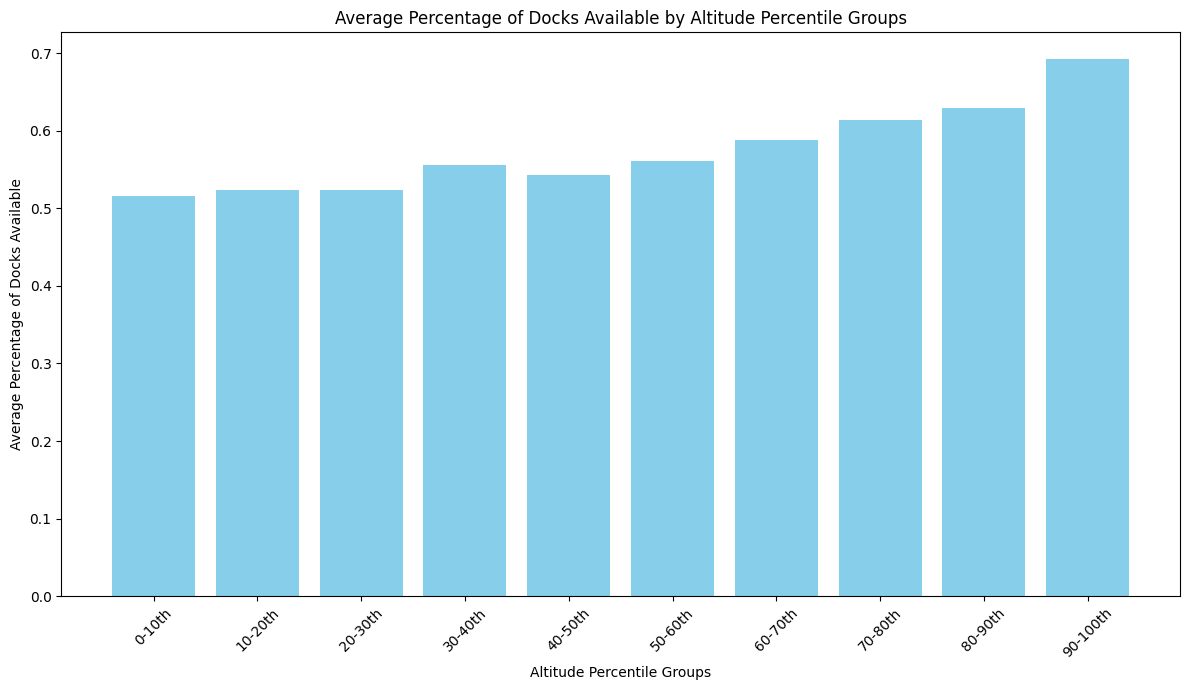

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentile groups for altitude
stations_final['altitude_percentile'] = pd.qcut(stations_final['altitude'], q=10, labels=False)  # Divide altitude into deciles

# Group by the new 'altitude_percentile' column and calculate the mean of 'percentage_docks_available'
stations_final_by_altitude_percentile = stations_final.groupby('altitude_percentile')['percentage_docks_available'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 7))  # Adjust the size to fit your specific needs
# Create a numeric range for the x-axis positions
x_pos = range(len(stations_final_by_altitude_percentile['altitude_percentile']))

# Plot using numeric x positions
plt.bar(x_pos, stations_final_by_altitude_percentile['percentage_docks_available'], color='skyblue')
plt.xlabel('Altitude Percentile Groups')  # Correct Label for the x-axis
plt.ylabel('Average Percentage of Docks Available')  # Correct Label for the y-axis
plt.title('Average Percentage of Docks Available by Altitude Percentile Groups')  # Correct Title of the plot

# Set x-ticks to be the altitude percentile groups from the DataFrame
plt.xticks(x_pos, [f'{i*10}-{(i+1)*10}th' for i in range(10)], rotation=45)  # Labels represent each decile

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

In this graph, we have grouped the stations into deciles based on altitude. Similar to the previous charts, a positive correlation between altitude and the percentage of docks available is observed.

### 3.4. Average Percentage of Docks Available by Altitude Percentile and Laboral Day

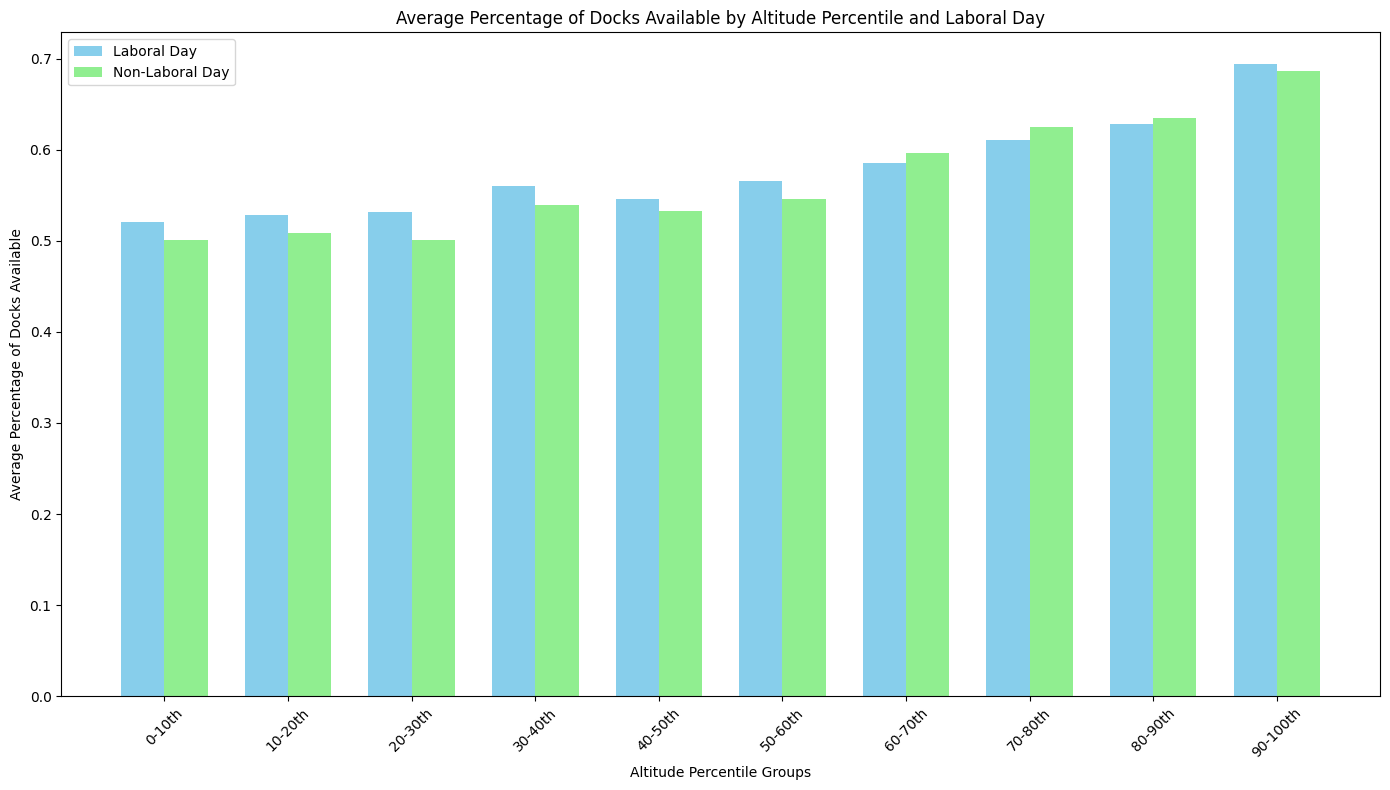

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by both 'altitude_percentile' and 'laboral_day', and calculate the mean of 'percentage_docks_available'
stations_final_by_altitude_percentile_and_laboral_day = stations_final.groupby(['altitude_percentile', 'laboral_day'])['percentage_docks_available'].mean().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the size to fit your specific needs

# Width of the bars in the bar plot
width = 0.35

# Create a numeric range for the x-axis positions
x_pos = np.arange(len(stations_final_by_altitude_percentile_and_laboral_day))

# Plot using numeric x positions for true and false 'laboral_day'
rects1 = ax.bar(x_pos - width/2, stations_final_by_altitude_percentile_and_laboral_day[True], width, label='Laboral Day', color='skyblue')
rects2 = ax.bar(x_pos + width/2, stations_final_by_altitude_percentile_and_laboral_day[False], width, label='Non-Laboral Day', color='lightgreen')

ax.set_xlabel('Altitude Percentile Groups')  # Label for the x-axis
ax.set_ylabel('Average Percentage of Docks Available')  # Label for the y-axis
ax.set_title('Average Percentage of Docks Available by Altitude Percentile and Laboral Day')  # Title of the plot

# Set x-ticks to be the altitude percentile groups from the DataFrame
ax.set_xticks(x_pos)
ax.set_xticklabels([f'{i*10}-{(i+1)*10}th' for i in range(10)], rotation=45)

ax.legend()  # Add a legend to differentiate between Laboral and Non-Laboral days

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

In this graph, stations are grouped into deciles based on altitude and categorized by labor (work) days. Consistent with previous charts, a positive correlation between altitude and the percentage of docks available is observed. However, it is also evident that there is a pronounced tendency for higher percentages of docks to be available at stations located at greater altitudes. This is attributed to the fact that on workdays, people move more frequently throughout the day and in various directions, which compensates for the distribution of bikes across the entire system.

### 3.5. Average Percentage of Docks Available by Altitude Percentile and Laboral Day

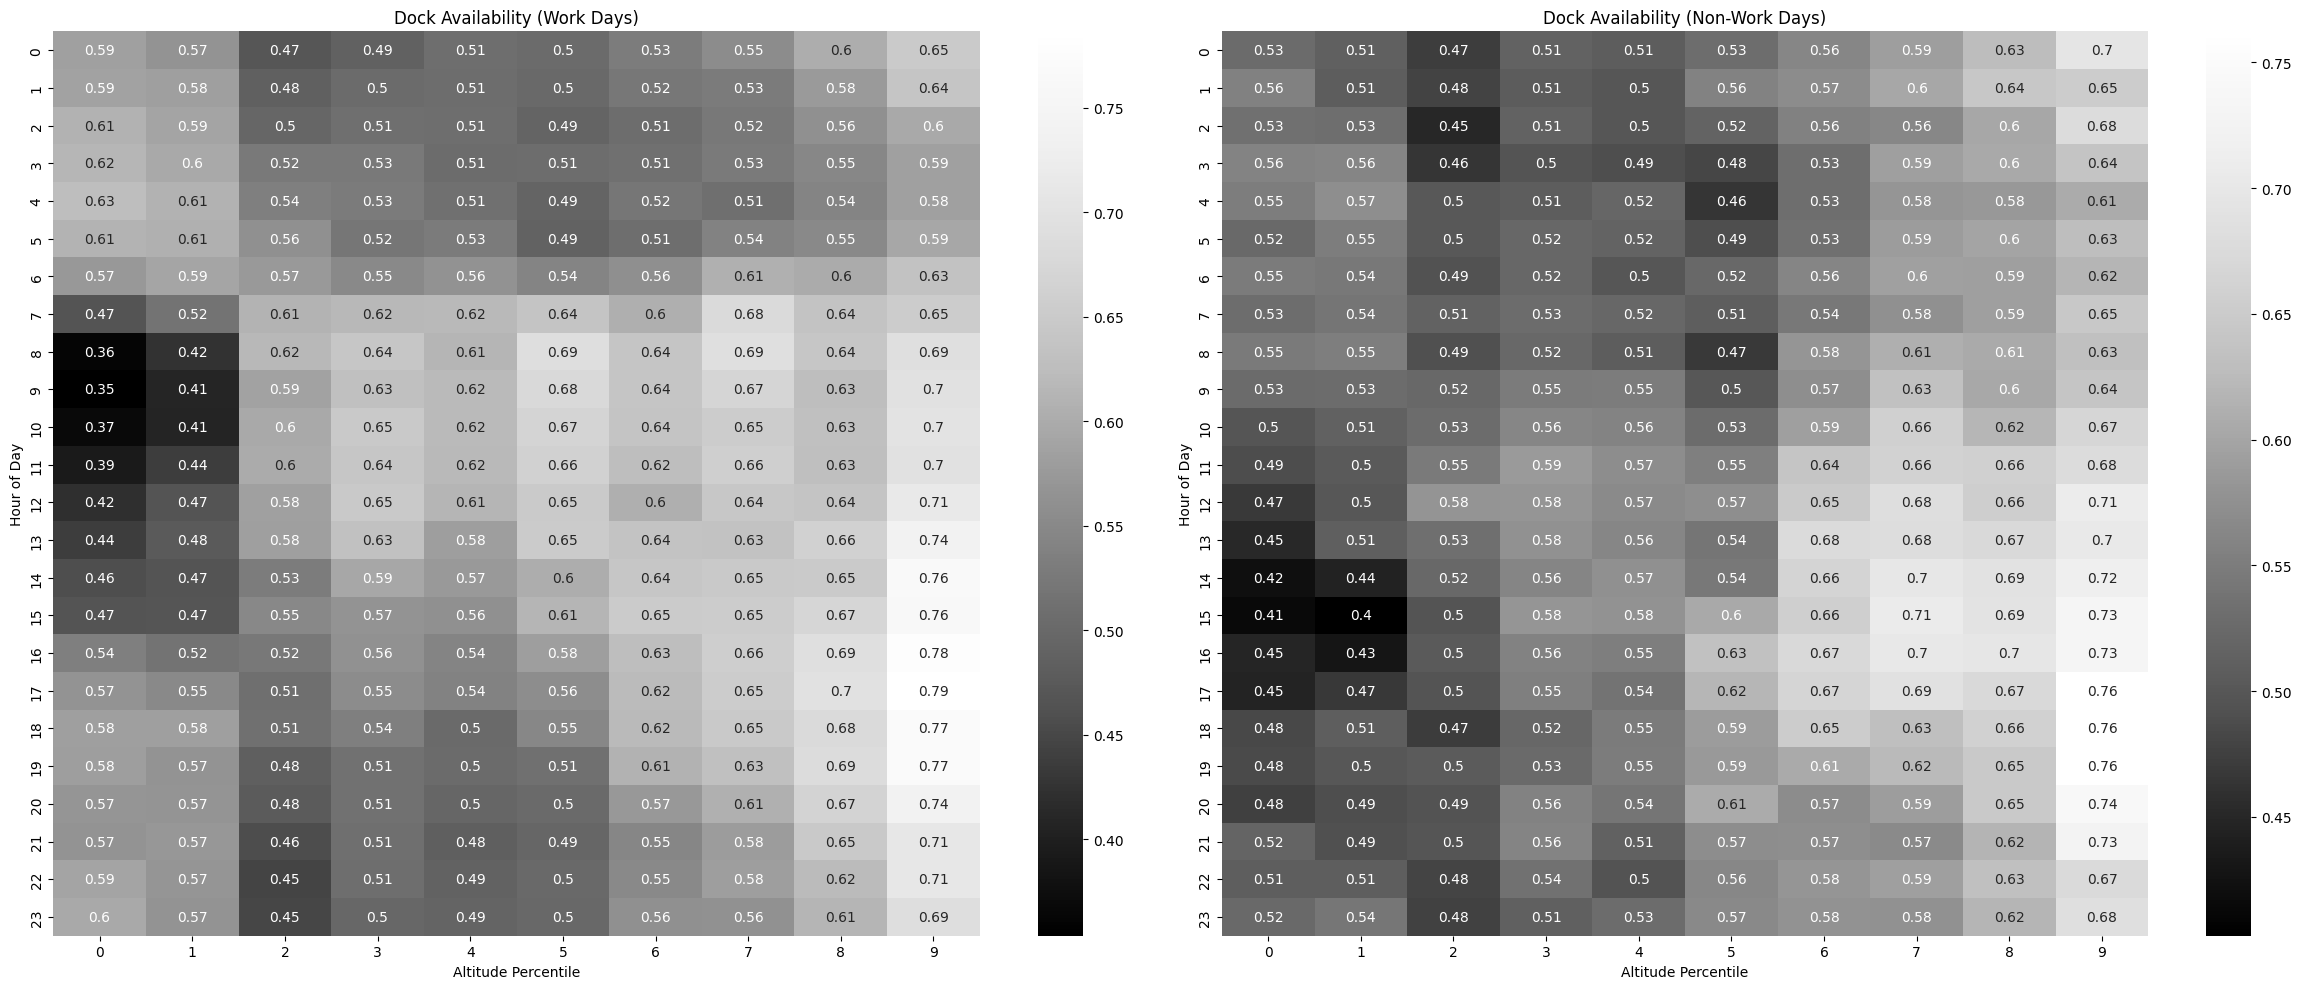

In [117]:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Datos del primer heatmap (días laborables)
    heatmap_data1 = stations_final[stations_final['laboral_day'] == True].pivot_table(
        values='percentage_docks_available', 
        index='hour', 
        columns='altitude_percentile', 
        aggfunc='mean'
    )

    # Datos del segundo heatmap (días no laborables)
    heatmap_data2 = stations_final[stations_final['laboral_day'] == False].pivot_table(
        values='percentage_docks_available', 
        index='hour', 
        columns='altitude_percentile', 
        aggfunc='mean'
    )

    # Configurar la figura para contener dos subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))  # Ajusta el tamaño como consideres necesario

    # Crear el primer heatmap para días laborables
    sns.heatmap(heatmap_data1, cmap="Greys_r", annot=True, ax=ax1)
    ax1.set_title('Dock Availability (Work Days)')
    ax1.set_xlabel('Altitude Percentile')
    ax1.set_ylabel('Hour of Day')

    # Crear el segundo heatmap para días no laborables
    sns.heatmap(heatmap_data2, cmap="Greys_r", annot=True, ax=ax2, )
    ax2.set_title('Dock Availability (Non-Work Days)')
    ax2.set_xlabel('Altitude Percentile')
    ax2.set_ylabel('Hour of Day')

    # Mostrar la figura con ambos heatmaps
    plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en la figura
    plt.show()

### 3.6. Average Percentage of Docks Available by Altitude Percentile and Weekday

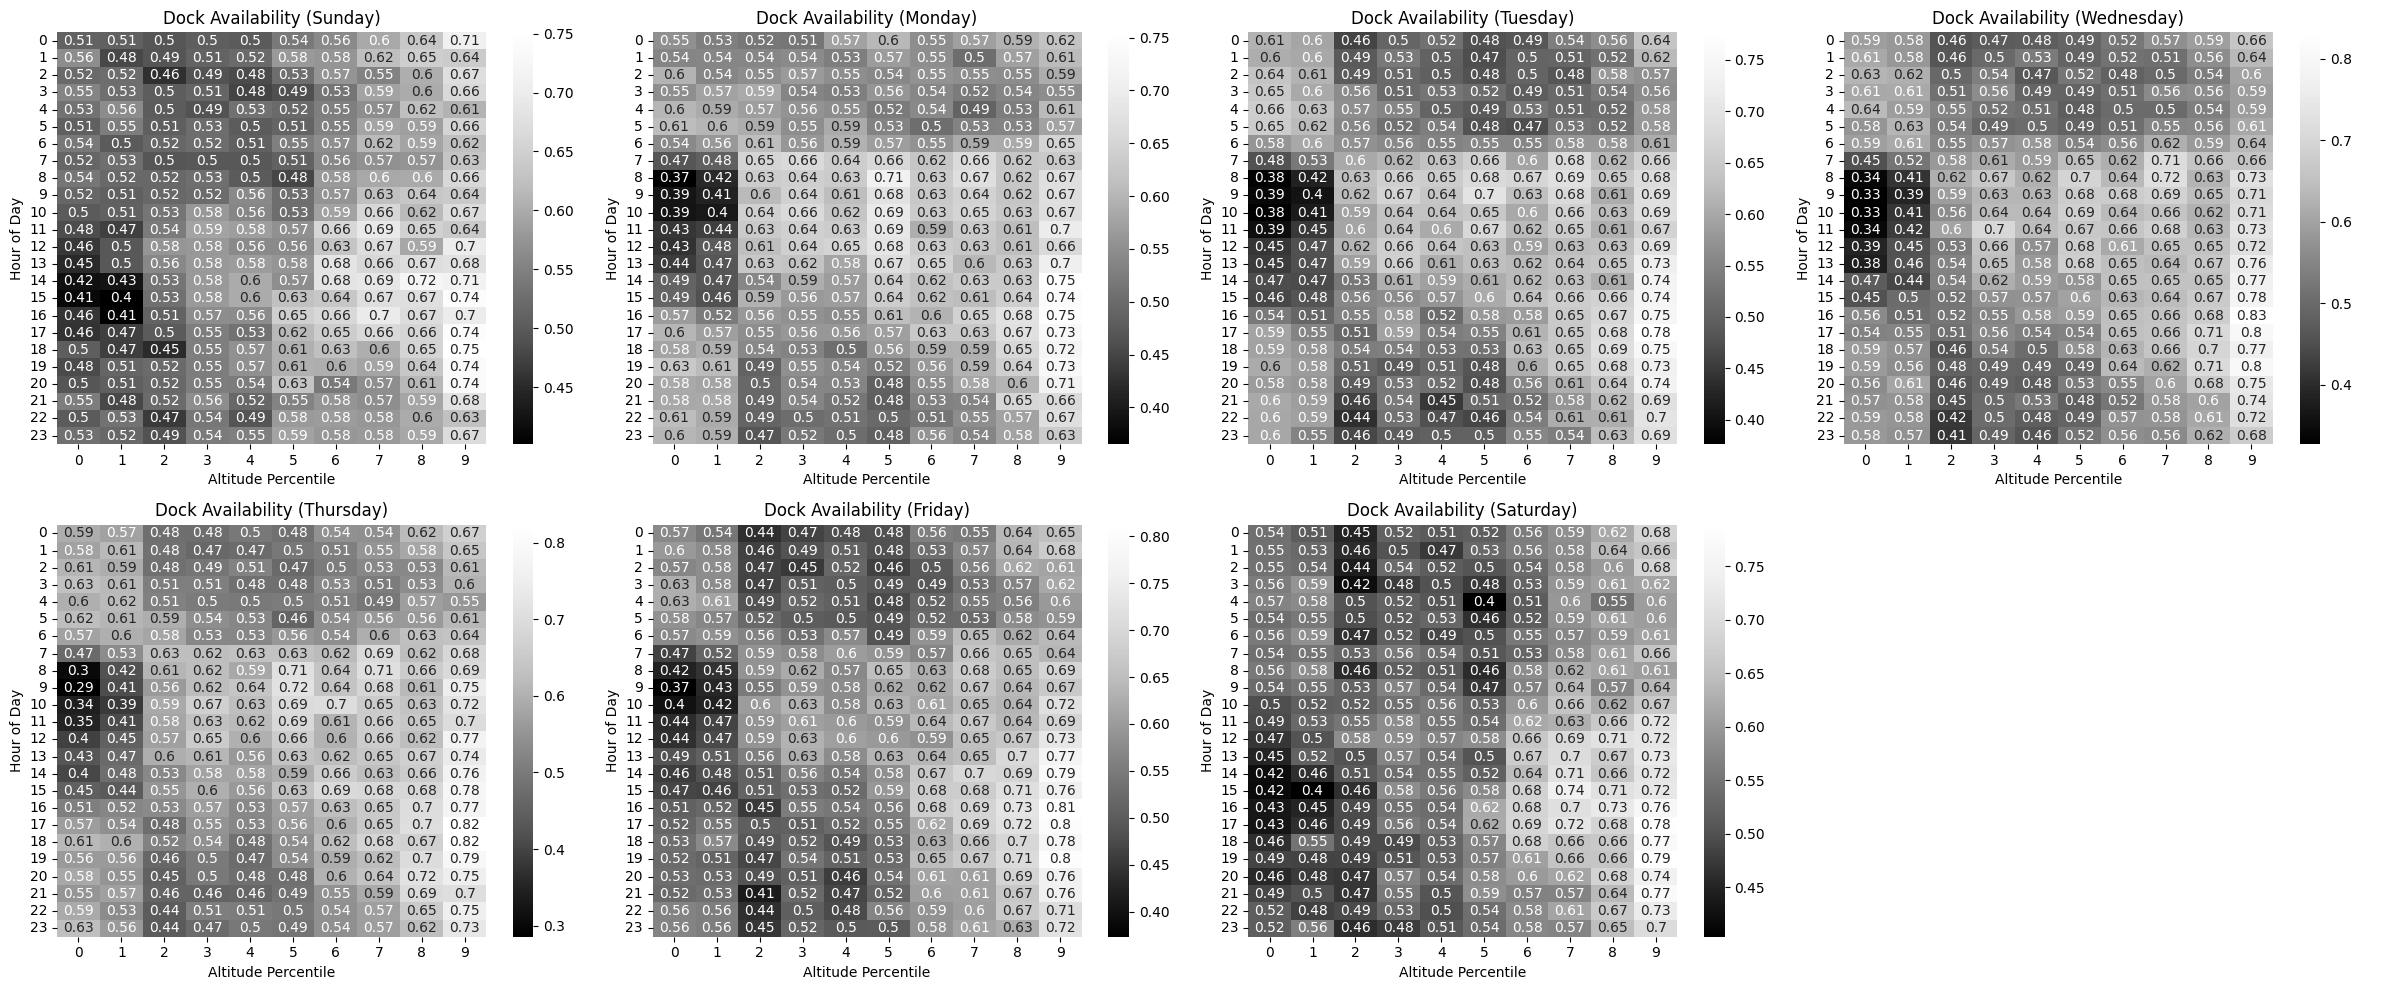

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Needed for datetime operations

# Create a figure with subplots dynamically based on the number of unique weekdays in the data
unique_days = stations_final['month'].unique()
num_days = len(unique_days)
cols = 4  # You can adjust the number of columns per row based on your preference
rows = (num_days + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, day in enumerate(unique_days):
    ax = axes[i]  # Use the flattened axes array
    day_data = stations_final[stations_final['month'] == day]
    
    if not day_data.empty:
        heatmap_data = day_data.pivot_table(
            values='percentage_docks_available', 
            index='hour', 
            columns='altitude_percentile', 
            aggfunc='mean'
        )
        
        if not heatmap_data.empty:
            sns.heatmap(heatmap_data, cmap="Greys_r", annot=True, ax=ax)
            ax.set_title(f'Dock Availability ({day})')
            ax.set_xlabel('Altitude Percentile')
            ax.set_ylabel('Hour of Day')
        else:
            ax.set_title(f'No Data to Display for {day}')
            ax.axis('off')
    else:
        ax.set_title(f'No Data for {day}')
        ax.axis('off')

# Disable any unused axes if the number of unique days is less than the number of subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### 3.7. Average Percentage of Docks Available by Altitude Percentile and Month

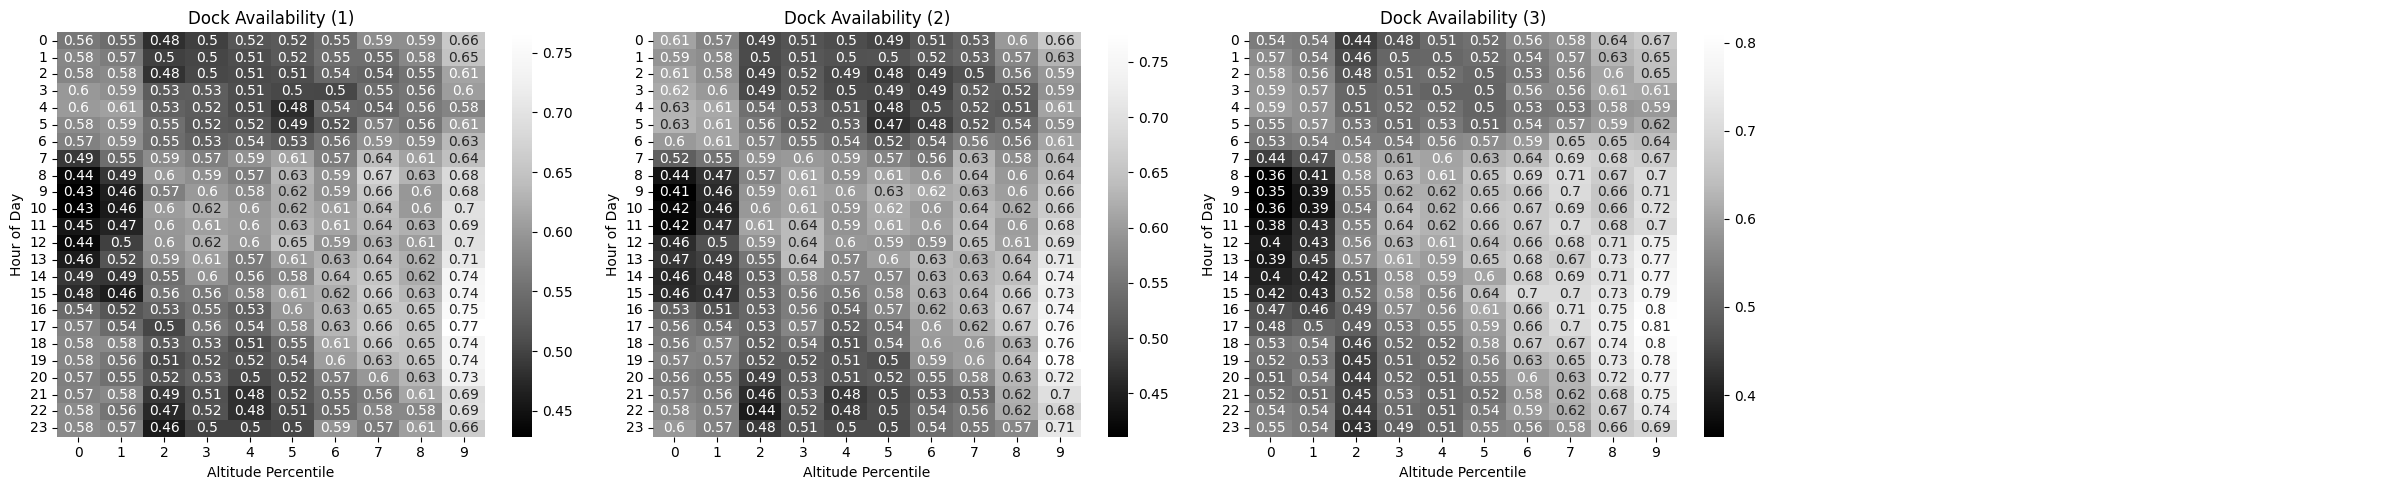

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Needed for datetime operations

# Create a figure with subplots dynamically based on the number of unique weekdays in the data
unique_days = stations_final['month'].unique()
num_days = len(unique_days)
cols = 4  # You can adjust the number of columns per row based on your preference
rows = (num_days + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, day in enumerate(unique_days):
    ax = axes[i]  # Use the flattened axes array
    day_data = stations_final[stations_final['month'] == day]
    
    if not day_data.empty:
        heatmap_data = day_data.pivot_table(
            values='percentage_docks_available', 
            index='hour', 
            columns='altitude_percentile', 
            aggfunc='mean'
        )
        
        if not heatmap_data.empty:
            sns.heatmap(heatmap_data, cmap="Greys_r", annot=True, ax=ax)
            ax.set_title(f'Dock Availability ({day})')
            ax.set_xlabel('Altitude Percentile')
            ax.set_ylabel('Hour of Day')
        else:
            ax.set_title(f'No Data to Display for {day}')
            ax.axis('off')
    else:
        ax.set_title(f'No Data for {day}')
        ax.axis('off')

# Disable any unused axes if the number of unique days is less than the number of subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# 4. Conclusion

In summary, the four 'internal' variables included in the dataset—postcode, hour, weekday, and altitude—provide a good approximation of the characteristics of the different areas in Barcelona that may affect bike usage. These variables help explain variations in the availability of spots at stations, even when the context variables (such as conditions over the previous four hours) at different stations are similar. 

Therefore, incorporating these four variables—or a combination of them—into the model could potentially enhance prediction accuracy. Moreover, these variables reflect specific characteristics of the station locations that cannot be directly measured (e.g., business vs. leisure) but are adequately approximated through these variables. We have thus decided not to complicate the model unnecessarily by including any other external variables, with the exception of precipitation levels, which are yet to be added.